In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]

In [3]:
x1_array = np.linspace(4,8,101)
x2_array = np.linspace(1,5,101)
xx1, xx2 = np.meshgrid(x1_array,x2_array)
# 创建色谱
rgb = [[255, 238, 255], 
 [219, 238, 244], 
 [228, 228, 228]] 

In [4]:
rgb = np.array(rgb)/255.
cmap_light = ListedColormap(rgb)
# 采用KMeans聚类
kmeans = KMeans(n_clusters=2)
cluster_labels = kmeans.fit_predict(X)
# 预测聚类
Z = kmeans.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

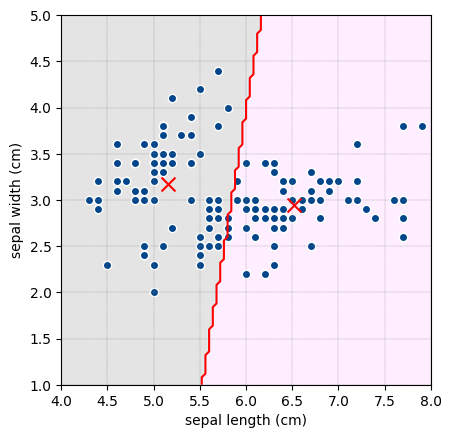

In [5]:
fig, ax = plt.subplots()
ax.contourf(xx1, xx2, Z, cmap=cmap_light)
ax.scatter(x=X[:, 0], y=X[:, 1],
 color=np.array([0, 68, 138])/255.,
 alpha=1.0,
 linewidth = 1, edgecolor=[1,1,1])
levels = np.unique(Z).tolist();
ax.contour(xx1, xx2, Z, levels=levels,colors='r')
centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1],
 marker="x", s=100, linewidths=1.5,
 color="r")
ax.set_xlim(4, 8); ax.set_ylim(1, 5)
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.grid(linestyle='--', linewidth=0.25,
 color=[0.5,0.5,0.5])
ax.set_aspect('equal', adjustable='box')
